# <font color='blue'>Machine Learning - Modelo preditivo de Classificacao</font>



### Usando SVM (Suporte Vector Machine)  Para Prever a Intenção de Compra de Usuários de E-Commerce

### Definição do Problema de Negócio:

Meu trabalho será avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

Usarei como fonte de dados o dataset:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe, ou seja, variável ALVO

## Importando os pacotes a serem utilizados

In [334]:
# Importando bibliotecas que irei utilizar...

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

- sklearn : É uma biblioteca de código aberto que fornece ferramentas simples e eficientes para: aprendizado supervisionado e não supervisionado, pré-processamento de dados, avaliação de modelos e seleção de modelos.
  
- O LabelEncoder é uma ferramenta do scikit-learn usada para transformar rótulos categóricos (texto ou classes) em valores numéricos, permitindo que algoritmos de Machine Learning processem dados categóricos
  
- StandardScaler é uma técnica de pré-processamento de dados do scikit-learn usada para padronizar/normalizar features numéricas, garantindo que todas tenham a mesma escala. Isso é crucial para muitos algoritmos de Machine Learning que são sensíveis à magnitude dos dados (ex: SVM, KNN, Regressão Linear).

## Carga e Dicionário de Dados

In [336]:
# Carregando os dados

df_original = pd.read_csv('online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dicionário de Dados:

"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

## Análise Exploratória

In [13]:
# Shape dos dados

df_original.shape

(12330, 18)

In [15]:
# Tipos de Dados

df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [17]:
# Verificando valores missing

print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [21]:
# Removendo as linhas com valores missing
# vamos excluir esses valores, porque 14 dados dentro de um volume de mais de 12 mil linhas, nesse caso
# não vai fazer diferença.

df_original.dropna(inplace = True)

In [23]:
# Verificando valores missing

print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [25]:
# Shape

df_original.shape

(12316, 18)

In [27]:
# Verificando Valores Únicos

df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Variáves categóricas são aquelas do tipo String, variáveis contínuas são as variáveis numéricas. Portanto, as categóricas, vamos fazer um tratamento diferenciado para elas.

Para fins de visualização, dividirei os dados em variáveis contínuas e categóricas. Tratarei todas as variáveis com menos de 30 entradas únicas como categóricas.

In [32]:
# Preparando os dados para o plot

# Cria uma cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [34]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [36]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [38]:
# Variáveis contínuas

df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [40]:
# Variáveis categóricas

df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


### Gráficos para variáveis numéricas.

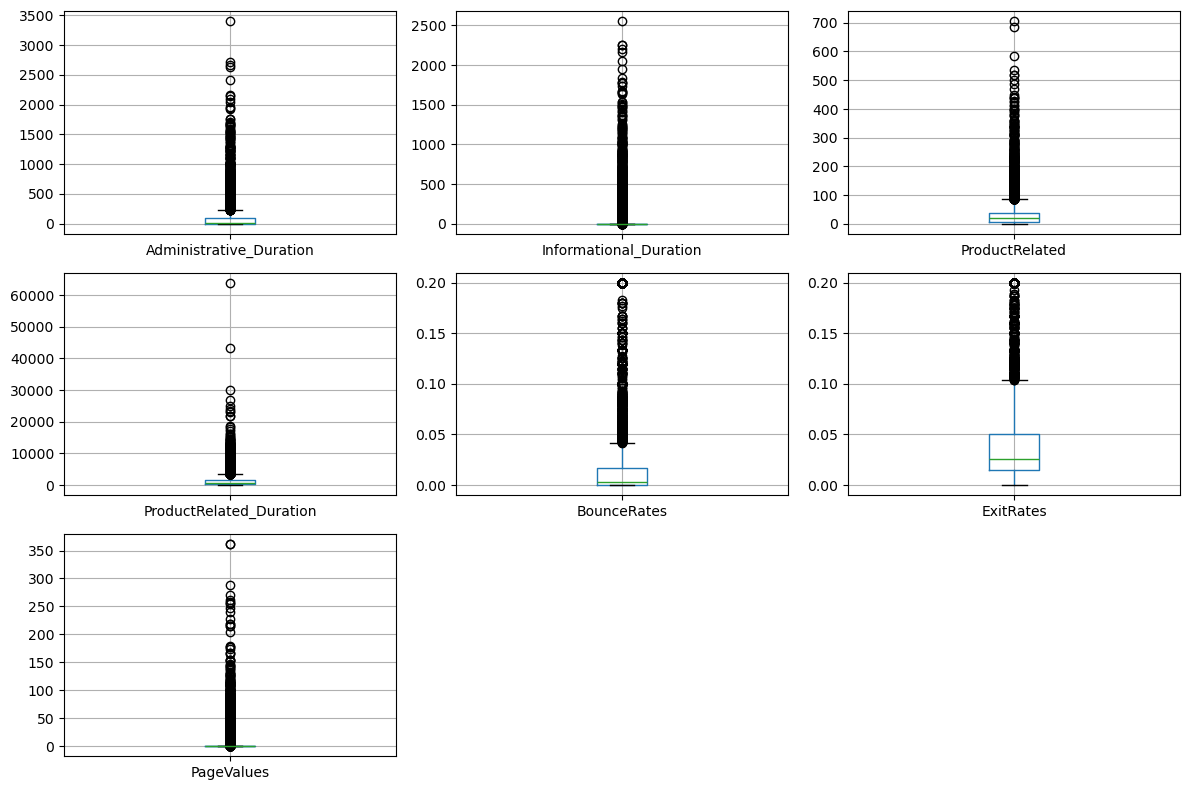

In [42]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    
# Podemos salvar também nossa imagem dos BoxPlosts    
plt.savefig('boxplot1.png')

<p> As variáveis contínuas parecem extremamente distorcidas. Vou aplicar transformação de log (logaritmo) para melhor visualização desses dados.

In [45]:
# Transformação de log nas variáveis contínuas

df[continuous] = np.log1p(1 + df[continuous])

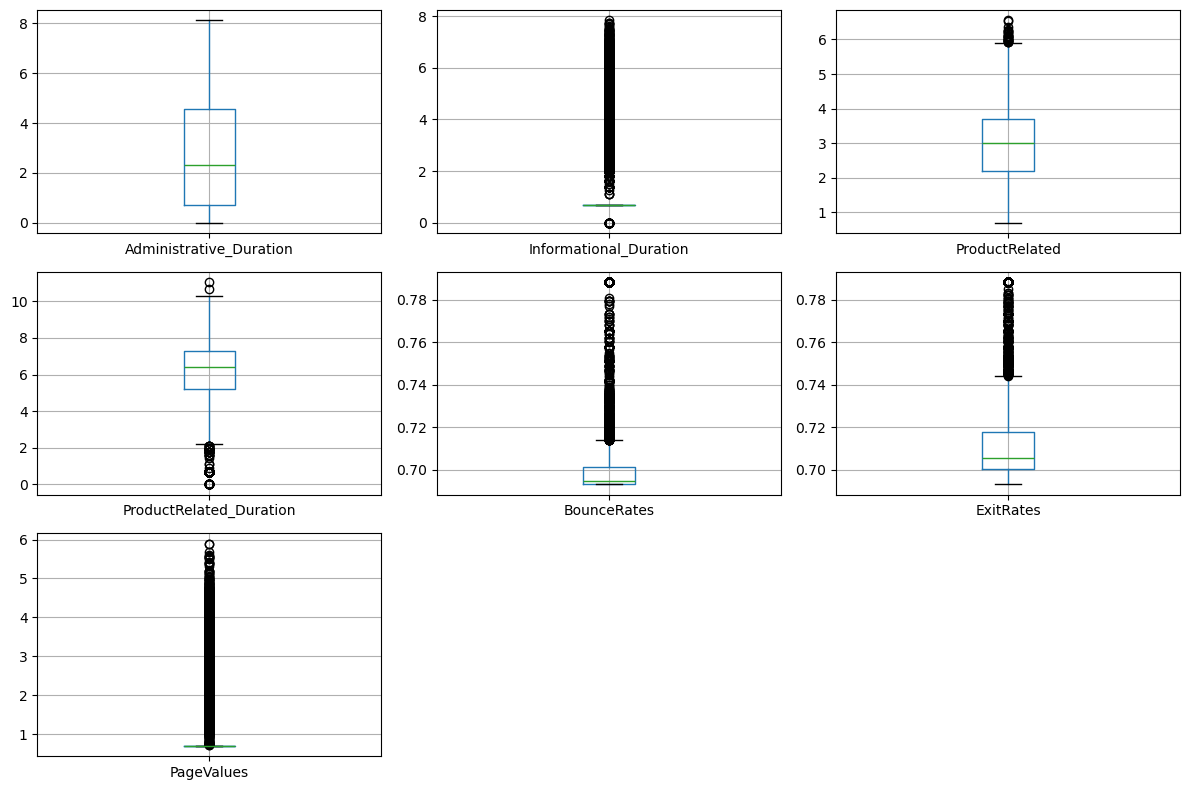

In [47]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('boxplot2.png')

Matriz de Correlação Entre Variáveis Contínuas.

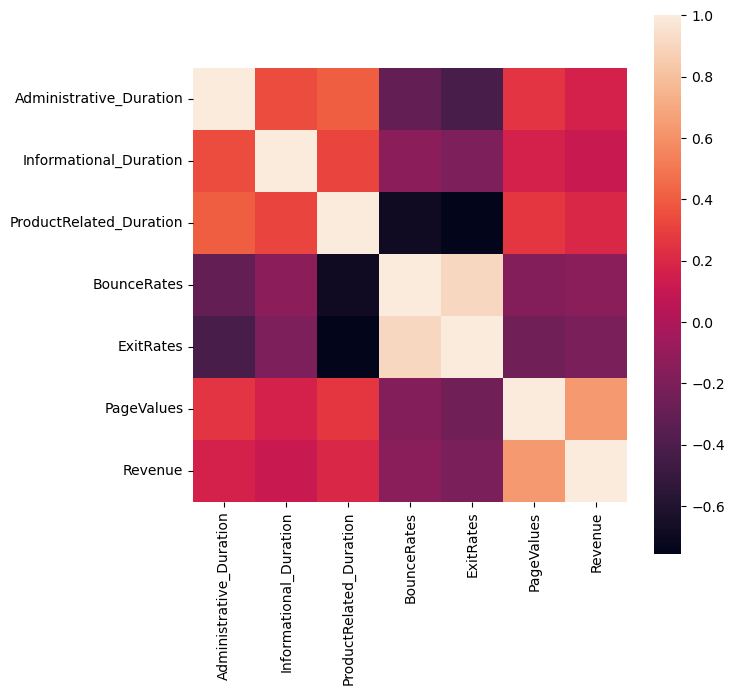

In [51]:
# Área de plotagem
plt.figure(figsize = (7,7))

# Matriz de Correlação 
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)
plt.show()

Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas.

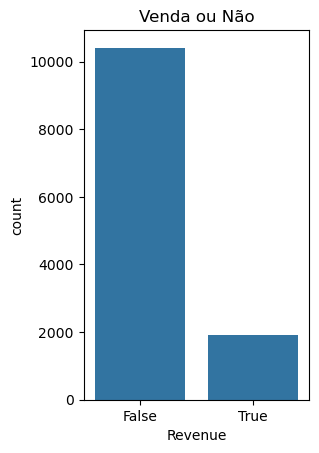

In [90]:
# Countplot Venda ou Não
# warnings.filterwarnings("ignore", category=FutureWarning)
# Aqui nesse gráfico conseguimos ver a diferença do público de vendas e de não vendas

plt.subplot(1, 2, 2)
plt.title("Venda ou Não")  
sns.countplot(x='Revenue', data=df)
plt.show()



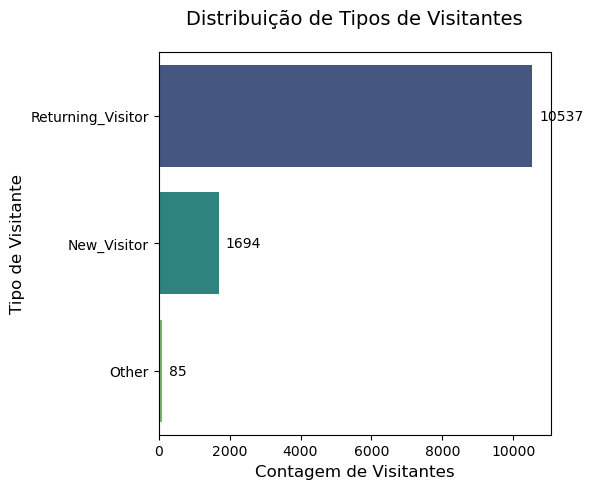

In [80]:
plt.figure(figsize=(6, 5))  # Ajusta o tamanho do gráfico

# Gráfico de barras horizontais com cores diferentes
sns.countplot(y='VisitorType', 
              data=df, 
              palette='viridis',  # Esquema de cores diferente
              order=df['VisitorType'].value_counts().index)  # Ordena por frequência

# Melhorando os rótulos e título
plt.xlabel('Contagem de Visitantes', fontsize=12)
plt.ylabel('Tipo de Visitante', fontsize=12)
plt.title('Distribuição de Tipos de Visitantes', fontsize=14, pad=20)

# Adiciona os valores nas barras
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{int(width)}', 
                      (width, p.get_y() + p.get_height()/2.),
                      ha='left', va='center',
                      xytext=(5, 0),
                      textcoords='offset points')

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

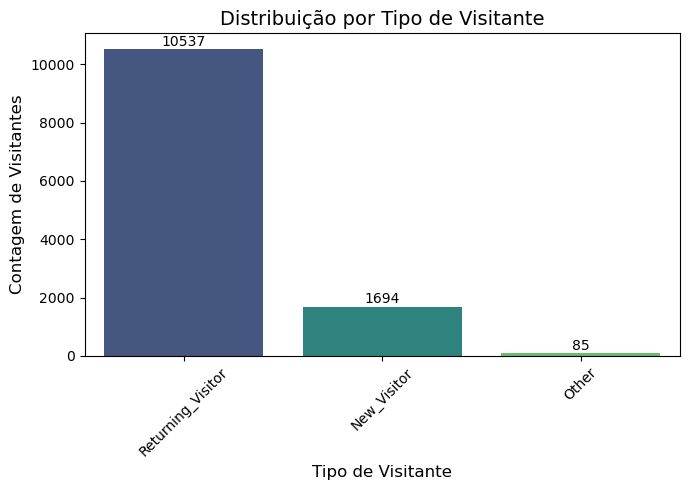

In [76]:
# Configuração do gráfico
plt.figure(figsize=(7, 5))

# Gráfico de barras VERTICAIS (padrão)
ax = sns.countplot(x='VisitorType', 
                   data=df, 
                   palette='viridis',  # Cores diferentes
                   order=df['VisitorType'].value_counts().index)  # Ordena por frequência

# Personalização
plt.xlabel("Tipo de Visitante", fontsize=12)
plt.ylabel("Contagem de Visitantes", fontsize=12)
plt.title("Distribuição por Tipo de Visitante", fontsize=14)

# Adiciona os valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., 
            height + 5,  # Posiciona o texto acima da barra
            f'{int(height)}', 
            ha='center', 
            va='bottom')

plt.xticks(rotation=45)  # Rotaciona rótulos do eixo X se necessário
plt.tight_layout()  # Ajusta o layout
plt.show()

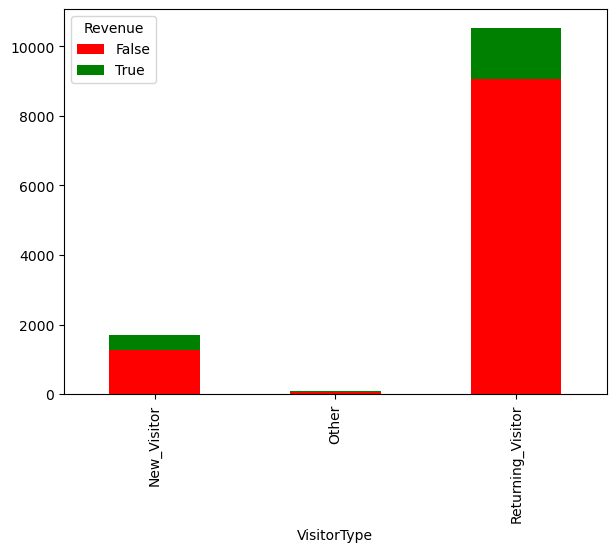

In [92]:
# Stacked Bar Tipo de Visitante x Revenue
# Aqui conseguimos ver a diferença de vendas e não vendas dentro dos tipos de públicos.

pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (7, 5), 
                                                   color = ['red', 'green'])
plt.show()

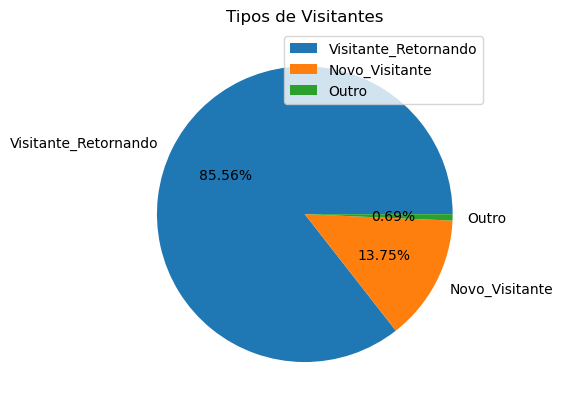

In [100]:
# Gráfico de Pizza de Tipos de Visitantes
# Aqui nós temos um outro tipo de visualização

labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

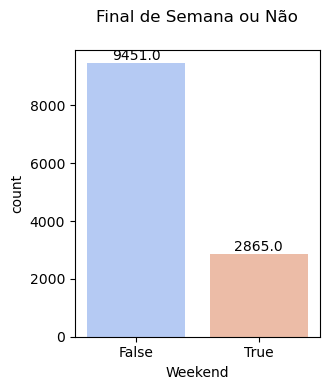

In [112]:
# Countplot Final de Semana ou Não

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.title("Final de Semana ou Não", pad=20)  # pad adiciona espaçamento
ax = sns.countplot(x='Weekend', data=df, palette='coolwarm')

# Adiciona valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.tight_layout()  # Ajusta automaticamente os espaços
plt.show()

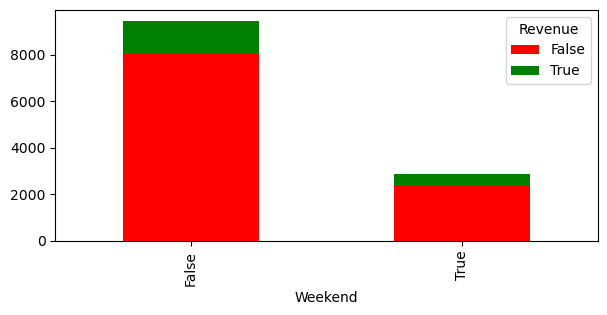

In [118]:
# Stacked Bar Final de Semana x Revenue

pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (7, 3), 
                                               color = ['red', 'green'])
plt.show()

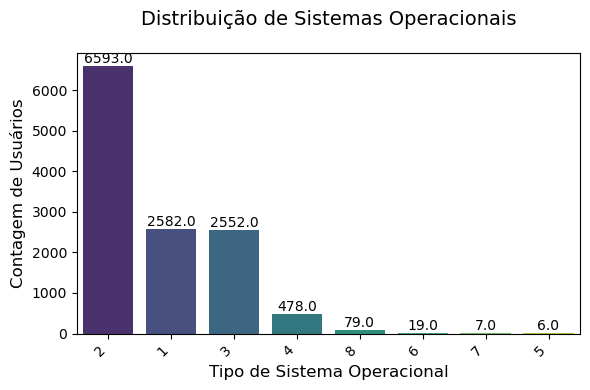

In [136]:
# Countplot Tipos de Sistemas Operacionais
# Nós não temos os nomes dos sistemas operacionais porque o arquivo foi disponibilizado sem o nome. Podemos deduzir que o 
# que apresenta maior contagem provavelmente é o sistema operacional windows porque é o sistema operacional que mais tem no mercado.

plt.figure(figsize=(6, 4)) 

#  personalizações
ax = sns.countplot(x='OperatingSystems', 
                   data=df,
                   palette='viridis',  # Esquema de cores mais claro
                   order=df['OperatingSystems'].value_counts().index)  # Ordena por frequência

# Melhorando os títulos e rótulos
plt.title("Distribuição de Sistemas Operacionais", fontsize=14, pad=20)
plt.xlabel("Tipo de Sistema Operacional", fontsize=12)
plt.ylabel("Contagem de Usuários", fontsize=12)

# Adicionando os valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Melhorando os ticks do eixo X
plt.xticks(rotation=45, ha='right')  # Rotaciona 45 graus para melhor leitura

plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()

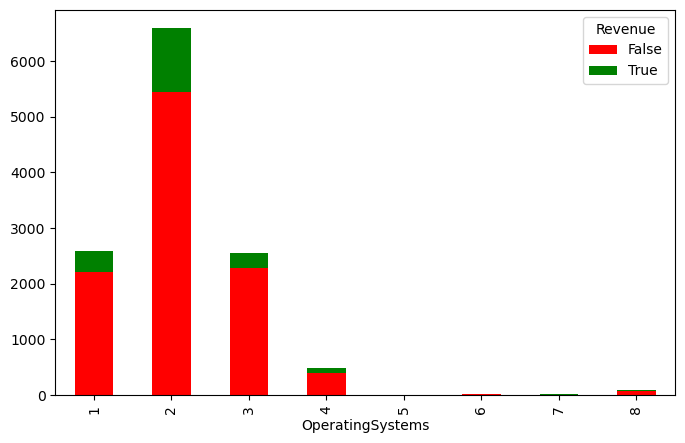

In [138]:
# Stacked Bar Tipo de SO x Revenue

pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (8, 5), 
                                                        color = ['red', 'green'])
plt.show()

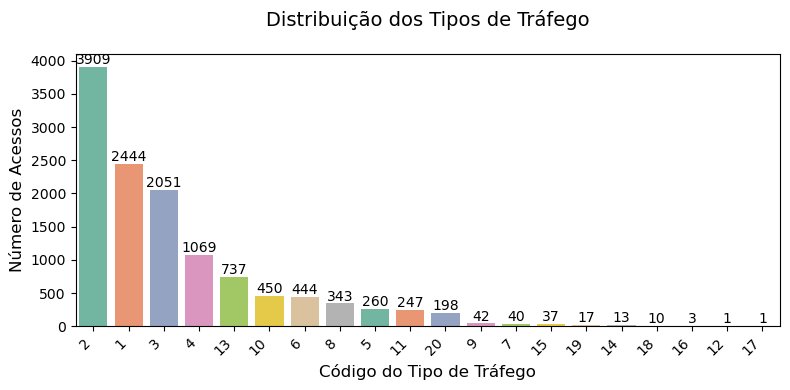

In [154]:
# Countplot Tipo de Tráfego

plt.figure(figsize=(8, 4))  # Definindo o tamanho adequado

# Criando o gráfico com tratamento para possíveis erros
ax = sns.countplot(x='TrafficType', 
                   data=df,
                   palette='Set2',  # Paleta de cores mais acessível
                   order=df['TrafficType'].value_counts().index)  # Ordenando por frequência

# Adicionando títulos e rótulos com formatação
plt.title("Distribuição dos Tipos de Tráfego", fontsize=14, pad=20)
plt.xlabel("Código do Tipo de Tráfego", fontsize=12)
plt.ylabel("Número de Acessos", fontsize=12)

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Ajustando os rótulos do eixo X
plt.xticks(rotation=45, ha='right')  # Rotação para melhor legibilidade

plt.tight_layout()  # Ajuste automático do layout
plt.show()

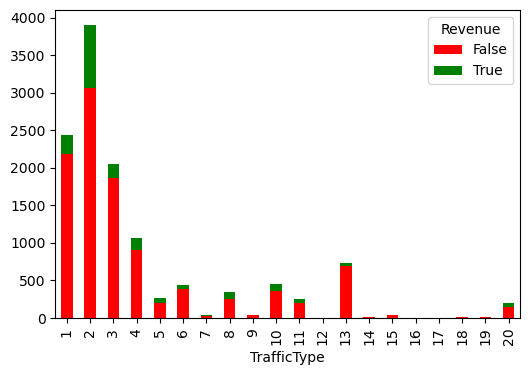

In [142]:
# Stacked Bar Tipos de Tráfego x Revenue

pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (6, 4), 
                                                   color = ['red', 'green'])
plt.show()

## Pré-Processamento dos Dados

In [156]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [164]:
# Cria o encoder
lb = LabelEncoder()

# São variáveis categóricas que estão como texto, então nós aplicamos a função para que essa variável se torne um número, isso porque
# o modelo preditivo, modelo de machine learning não entende letras, só entende números. E se não fizermos esse tratamento, ele simplesmente não
# vai ler essas variáveis e com isso vamos perder esses dados. 

# Aplica o encoder nas variáveis que estão com string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace = True)

In [170]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [172]:
# Shape

df_original.shape

(12316, 18)

In [176]:
# Verificando se a variável resposta está balanceada
# Aqui podemos ver que ela não está balanceada.

target_count = df_original.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

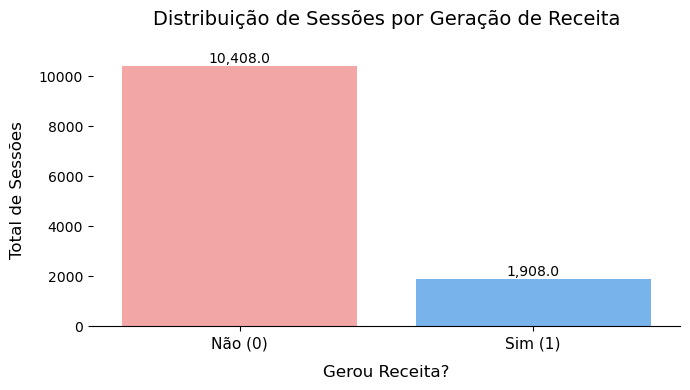

In [198]:
# Plot 

plt.figure(figsize=(7, 4))  # Definindo o tamanho do gráfico

# Gráfico com formatação profissional
ax = sns.countplot(x='Revenue', 
                   data=df_original,
                   palette=['#ff9999', '#66b3ff'],  # Cores personalizadas (Não/Sim)
                   order=[False, True])  # Ordem lógica

# Removendo as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionando os valores exatos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',  # Formato com separador de milhar
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Rótulos
plt.xlabel('Gerou Receita?', fontsize=12, labelpad=10)
plt.ylabel('Total de Sessões', fontsize=12, labelpad=10)
plt.title('Distribuição de Sessões por Geração de Receita', fontsize=14, pad=20)

# Ajustando os ticks do eixo X para mostrar "Não" e "Sim"
plt.xticks(ticks=[0, 1], labels=['Não (0)', 'Sim (1)'], fontsize=11)

plt.tight_layout()
plt.show()

In [202]:
# Instalar e importar o pacote imblearn
# Se apresentar erro na instalação execute este comando !pip install scikit-learn==1.1.0 --user 
# Após a atualização estar completa, reinicie o jupyter notebook.
#!pip install -q imblearn
#import imblearn

In [226]:
!pip install -q imblearn

In [228]:
import imblearn

In [204]:
# Shape
df_original.shape

(12316, 18)

In [208]:
# Variáveis explicativas

df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [212]:
# Variável Target
# Aqui estamos separando a variável target das outras variáveis.

df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceamento de Classe - Oversampling

In [219]:
# Importa a função
# import sklearn
# A função vai aumentar os registros de forma coerente para que fique balanceado. Essa função estatisticamente faz uma relação entre os números
# e com isso gera novos dados para que fique balanceado. 

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]  
y = df_original.iloc[:, 17] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

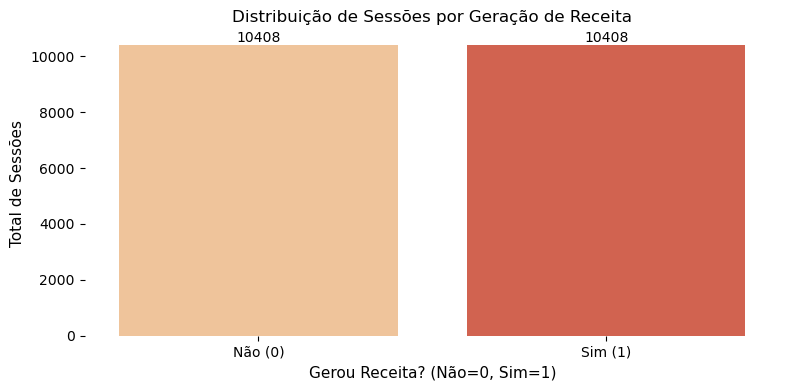

In [224]:
# Plot 

plt.figure(figsize=(8, 4))

# 1. Verificação e preparação dos dados
if not isinstance(y_res, pd.DataFrame):
    y_res = pd.DataFrame(y_res, columns=['Revenue'])

# 2. Garantir que os valores são numéricos
y_res['Revenue'] = y_res['Revenue'].astype(int)

# 3. Criar o gráfico
ax = sns.countplot(x='Revenue',
                  data=y_res,
                  palette="OrRd",
                  order=sorted(y_res['Revenue'].unique()))

# 4. Customização do gráfico
plt.box(False)
plt.xlabel('Gerou Receita? (Não=0, Sim=1)', fontsize=11)
plt.ylabel('Total de Sessões', fontsize=11)
plt.title('Distribuição de Sessões por Geração de Receita', fontsize=12)

# 5. Adicionar valores nas barras (forma segura)
for p in ax.patches:
    height = int(p.get_height())  # Garante que é um número
    ax.annotate(f'{height}',
               (p.get_x() + p.get_width()/2., height),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

# 6. Ajustar rótulos do eixo X
ax.set_xticklabels([f'Não ({ax.get_xticks()[0]})', f'Sim ({ax.get_xticks()[1]})'])

plt.tight_layout()
plt.show()

In [230]:
# Shape dos dados originais

df_original.shape

(12316, 18)

In [240]:
# Shape dos dados reamostrados 
# Como fizemos um balanceamento dos dados, podemos perceber que ganhamos mais registros nele.

# Como foi colocado la em cima, o X_RES representa as variáveis explicativas.

X_res.shape

(20816, 17)

In [242]:
# Shape dos dados reamostrados 

# Como foi colocado la em cima, o Y_RES representa a variável target.

y_res.shape

(20816, 1)

In [236]:
# Ajustando X e y
# Para fins de demonstração deste exemplo vou utilizar somente 1.000 observações para não demorar muito o tempo de treinamento
# Porém se fosse para fazer mesmo real, teria que fazer para todos.
# modelo

#X = X_res   Aqui nós fariamos com todos os dados
#y = y_res   Aqui nós fariamos com todos os dados

X = X_res.head(1000)
y = y_res.head(1000)

In [244]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,10.0,0.0,0.0,39.0,1152.500000,0.011966,0.017802,0.0,0.0,5,3,2,1,3,2,False
996,10.0,164.5,1.0,3.0,61.0,2292.679762,0.000000,0.009552,0.0,0.0,5,2,2,1,1,2,False
997,0.0,0.0,0.0,0.0,9.0,329.000000,0.022222,0.044444,0.0,0.0,5,2,2,3,1,2,False
998,0.0,0.0,0.0,0.0,8.0,111.666667,0.000000,0.025000,0.0,0.0,5,2,2,1,1,2,False


In [248]:
y

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


A divisão dos dados em conjuntos de treino e teste é uma prática essencial em Machine Learning para garantir que o modelo:

- Aprenda padrões gerais (não apenas decore os dados de treino).

- Tenha desempenho realista em dados nunca vistos antes.

- Evite overfitting (quando o modelo se ajusta demais aos dados de treino e falha em generalizar).

## Evitar Overfitting (Sobreajuste)
Se um modelo for treinado e avaliado nos mesmos dados, ele pode simplesmente "decorar" as respostas (overfitting), em vez de aprender padrões úteis.

- Exemplo: Um aluno que só decora as respostas de um simulado, mas não consegue resolver questões novas.

✅ Solução:

- Treinar em 70-80% dos dados (treino).

- Testar em 20-30% separados (teste).

## Avaliação Justa do Modelo
O conjunto de teste simula como o modelo se comportará com dados nunca vistos. Se o modelo performar bem no treino, mas mal no teste, significa que ele não generaliza bem.

📊 Exemplo de má avaliação:

- Acurácia no treino: 99%

- Acurácia no teste: 60%
→ O modelo está overfitting!

## Otimização de Hiperparâmetros
Usamos validação cruzada (cross-validation) para ajustar os parâmetros do modelo sem vazar dados de teste. Isso evita que o modelo seja ajustado para performar bem apenas no teste (data leakage).



In [265]:
# Divisão em Dados de Treino e Teste.
# Quando formos criar e treinar o modelo preditivo, passamos cerca de 60/70% dos nossos dados.

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

- O parâmetro random_state controla a aleatoriedade na divisão dos dados entre treino e teste. Quando você define um valor fixo (como 42), garante que:

- A divisão será reproduzível: Se você ou outra pessoa executar o código novamente, os dados serão divididos exatamente da mesma maneira.

- Resultados consistentes: Importante para testes, comparação de modelos e depuração.

#### Por que usar random_state?
- Sem random_state: A cada execução, os dados são divididos aleatoriamente, podendo gerar resultados diferentes.

- Com random_state: A divisão é pseudoaleatória (sempre a mesma para o mesmo valor).

## Modelo SVM

### Modelo Base com Kernel Linear

In [275]:
# Cria o modelo

modelo_v1 = svm.SVC(kernel = 'linear')

In [279]:
# Treinamento

start = time.time()
modelo_v1.fit(X_treino, y_treino) #.FIT é o método que vai fazer o treinamento. Xtreino é a variável de entrada e ytreino a variável alvo.
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start) # Só para vermos quanto tempo levou para esse modelo ser treinado. 

Tempo de Treinamento do Modelo: 38.25510287284851


In [281]:
# Previsões
# Agora vamos fazer as previsões apenas com o modelo de teste.

previsoes_v1 = modelo_v1.predict(X_teste)

In [283]:
# Dicionário de métricas e metadados

SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [285]:
# Print

print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.52,
 'Recall': 0.7647058823529411,
 'F1 Score': 0.6190476190476191,
 'Acurácia': 0.9466666666666667,
 'AUC': 0.7527272727272728}

### Modelo com Kernel Linear e Dados Padronizados (Scaled)

In [287]:
# ***** Atenção *****
# O método nesta célula não deve ser usado, pois estaríamos aplicando o fit em teste e isso não é o ideal
# Aplicamos o fit somente nos dados de treino e aplicamos o transform nos dados de teste
# Padronização
# X_treino_scaled = StandardScaler().fit_transform(X_treino)
# X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [289]:
# Agora sim, a forma ideal de aplicar a padronização em treino e teste
# Padronização

sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

Obsevação:

Para impedir que as informações sobre a distribuição do conjunto de teste vazem em seu modelo, o ideal é aplicar a padronização em separado nos dados de treino e de teste, ajustando o redimensionador apenas aos dados de treinamento, padronizando então os conjuntos de treinamento e teste com esse redimensionador (exatamente como está na célula acima). Ao ajustar o redimensionador no conjunto de dados completo antes da divisão em treino e teste, informações sobre o conjunto de testes são usadas para transformar o conjunto de treinamento.

Conhecer a distribuição de todo o conjunto de dados pode influenciar como você detecta e processa outliers, bem como como você parametriza seu modelo. Embora os dados em si não sejam expostos, há informações sobre a distribuição dos dados. Como resultado, o desempenho do seu conjunto de testes não é uma estimativa real do desempenho em dados invisíveis.

Sempre aplique a padronização depois de fazer a divisão em treino e teste, exatamente como fizemos aqui. Usamos fit_transform() nos dados de treino e transform() nos dados de teste quando usamos o StandardScaler().

In [291]:
X_treino_scaled

array([[-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259,  1.83711731],
       [ 0.07887179, -0.33356238, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
        -2.97643326, -0.54433105],
       [ 0.07887179, -0.16326629, -0.31756214, ..., -0.41048407,
        -2.97643326,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105]])

In [293]:
X_teste_scaled

array([[ 0.4134794 , -0.02571945, -0.31756214, ..., -0.06345648,
         0.33597259, -0.54433105],
       [-0.25573582, -0.26151404, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [ 1.08269462,  1.52462998,  4.89244178, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [-0.25573582, -0.41216058, -0.31756214, ...,  0.63059872,
         0.33597259,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259,  1.83711731]])

In [295]:
# Cria o modelo

modelo_v2 = svm.SVC(kernel = 'linear')

In [299]:
# Treinamento

start = time.time() # Só para vermos quanto tempo levou para esse modelo ser treinado. 
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start) # Só para vermos quanto tempo levou para esse modelo ser treinado. 

Tempo de Treinamento do Modelo: 0.009034872055053711


In [301]:
# Previsões

previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [303]:
# Dicionário de métricas e metadados

SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [305]:
# Print

print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846154,
 'Acurácia': 0.95,
 'AUC': 0.7363636363636362}

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [307]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.19559574127197266
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'C': 50.0, 'gamma': 0.003}


In [309]:
# Previsões

previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [311]:
# Dicionário de métricas e metadados

SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acurácia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)}

In [313]:
# Print

print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.52,
 'Recall': 0.8666666666666667,
 'F1 Score': 0.65,
 'Acurácia': 0.9533333333333334,
 'AUC': 0.7563636363636363}

### Otimização de Hiperparâmetros com Grid Search e Kernel Polinomial

In [315]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = 'poly')

# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.17860007286071777
Acurácia em Treinamento: 94.86%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 3, 'gamma': 0.01}


In [317]:
# Previsões

previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [319]:
# Dicionário de métricas e metadados

SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v4, y_teste),
               'Recall':recall_score(previsoes_v4, y_teste),
               'F1 Score':f1_score(previsoes_v4, y_teste),
               'Acurácia':accuracy_score(previsoes_v4, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v4)}

In [321]:
# Print

print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acurácia': 0.94,
 'AUC': 0.6945454545454546}

In [323]:
# Concatena todos os dicionários em um dataframe do Pandas

resumo = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2':pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3':pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4':pd.Series(SVM_dict_v4)})

In [327]:
# Print

resumo

,SVM_Modelo_1,SVM_Modelo_2,SVM_Modelo_3,SVM_Modelo_4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.52,0.48,0.52,0.4
Recall,0.764706,0.857143,0.866667,0.769231
F1 Score,0.619048,0.615385,0.65,0.526316
Acurácia,0.946667,0.95,0.953333,0.94
AUC,0.752727,0.736364,0.756364,0.694545
